In [2]:
import numpy as np
import pandas as pd

In [3]:
covid_data = pd.read_csv("time_series_2019-ncov-Confirmed.csv")

In [4]:
covid_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
covid_data1 = covid_data.drop(['Lat','Long'], axis = 1)
covid_data1

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,2,1,2,2,4,4,7,7,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Dates where less than 70% of the countries have 0 cases

In [6]:
count = 0
for col in covid_data1.columns:
    for i in covid_data1[col]:
        if(i == 0):
            count+=1
    if(count>341):
        covid_data1.drop([col], axis = 1, inplace = True)
    count=0
covid_data1

,Province/State,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,43,47,48,50,50,50,53,59,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,331,360,420,461,502,511,581,639,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,110,117,130,138,150,150,160,178,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,50,50,83,93,99,117,129,149,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
covid_data2 = covid_data1.drop(['Province/State'], axis = 1)
covid_data2

,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
total_country_cases = covid_data2.groupby('Country/Region').sum()

In [9]:
pd.set_option('display.max_rows', total_country_cases.shape[0]+1)
total_country_cases

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,225
Armenia,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194
Australia,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1314


In [10]:
import matplotlib.pyplot as plt



Graph showing country-wise cases

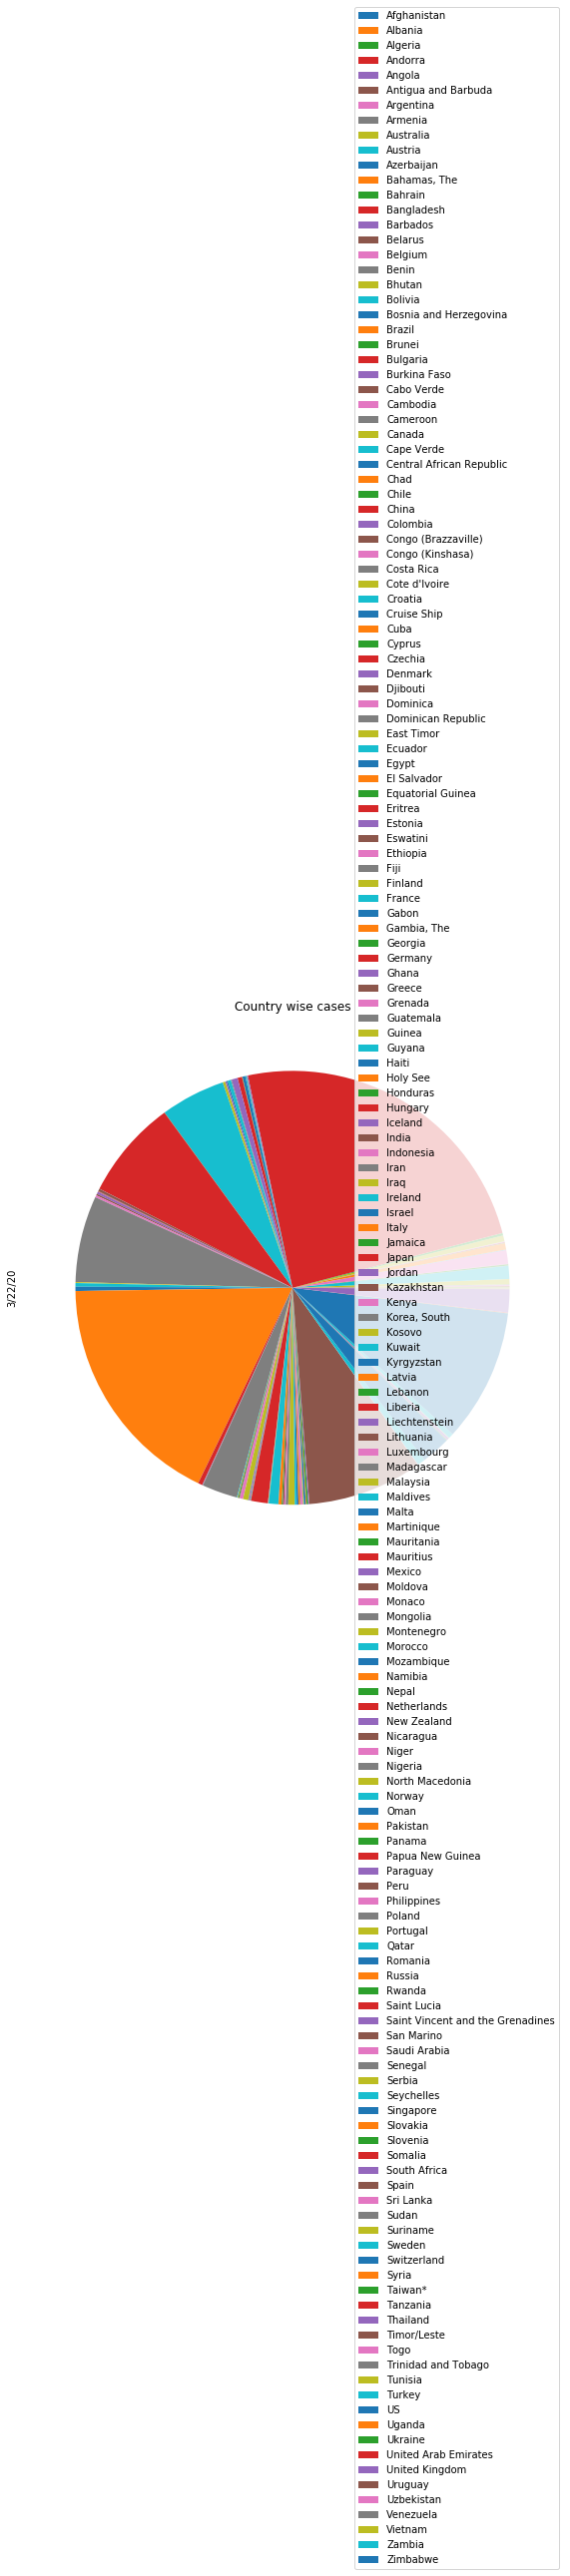

In [11]:
plot = total_country_cases.plot.pie(y='3/22/20', title = "Country wise cases", figsize=(10,10), labeldistance=None).legend(loc='right')

In [12]:
total_day_cases = total_country_cases.sum(axis = 0)

In [13]:
total_day_cases

03-04-2020     95120
03-05-2020     97882
03-06-2020    101784
03-07-2020    105821
03-08-2020    109795
03-09-2020    113561
03-10-2020    118592
03-11-2020    125865
03-12-2020    128343
3/13/20       145193
3/14/20       156094
3/15/20       167446
3/16/20       181527
3/17/20       197142
3/18/20       214910
3/19/20       242708
3/20/20       272166
3/21/20       304524
3/22/20       335955
dtype: int64

Graph showing date-wise cases

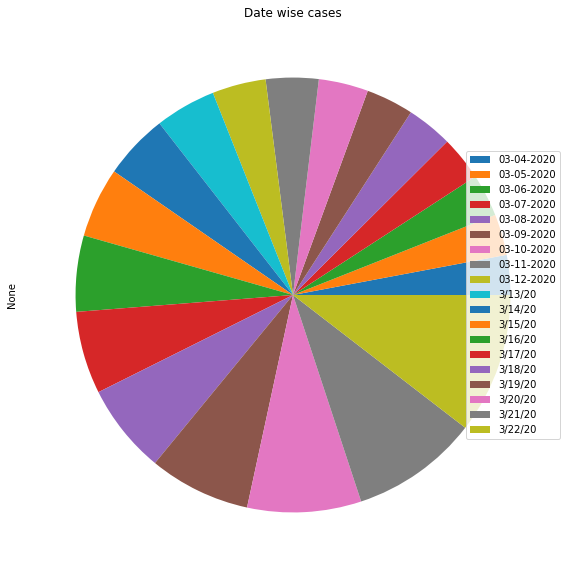

In [14]:
total_day_cases.plot.pie(labeldistance = None, title = "Date wise cases", figsize = (10,10)).legend(loc = "right")
plt.show()

In [15]:
c2c = pd.read_csv("c2c.csv")

In [16]:
c2c

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [17]:
c2c = c2c.replace(to_replace =["Burkina","CapeVerde","CentralAfricanRepublic","Congo","Congo","EquatorialGuinea","Gambia","IvoryCoast","SaoTomeandPrincipe","SierraLeone","SouthAfrica","SouthSudan","EastTimor",'"Korea',"RussianFederation","SaudiArabia","SriLanka","UnitedArabEmirates","BosniaandHerzegovina","CZ","SanMarino","UnitedKingdom","VaticanCity","AntiguaandBarbuda","Bahamas","CostaRica","DominicanRepublic","ElSalvador","SaintKittsandNevis","SaintLucia","SaintVincentandtheGrenadines","TrinidadandTobago","MarshallIslands","NewZealand","PapuaNewGuinea","SolomonIslands"], 
                 value =["Burkina Faso","Cape Verde", "Central African Republic","Congo(Brazzaville)","Congo(Kinshasa)","Equatorial Guinea","Gambia, The","Ivory Coast","Sao Tome and Principe","Sierra Leone","South Africa","South Sudan","Timor/Leste","Korea","Russia","Saudi Arabia","Sri Lanka","United Arab Emirates","Bosnia and Herzegovina","Czechia","San Marino","United Kingdom","Vatican City","Antigua and Barbuda","Bahamas, The","Costa Rica","Dominican Republic","El Salvador","Saint Kiits and Nevis","Saint Lucia","Saint Vincent and the Grenadines","Trinidad and Tobago","Marshall Islands","New Zealand","Papua New Guinea","Solomon Islands"])

In [18]:
c2c.rename(columns = {'Country':'Country/Region'}, inplace = True)
pd.set_option('display.max_rows', c2c.shape[0]+1)
c2c

,Continent,Country/Region
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
5,Africa,Burundi
6,Africa,Cameroon
7,Africa,Cape Verde
8,Africa,Central African Republic
9,Africa,Chad


In [19]:
cont_cases = pd.merge(c2c,total_country_cases, on = "Country/Region")

In [20]:
cont_cases

,Continent,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Africa,Algeria,12,12,17,17,19,20,20,20,...,26,37,48,54,60,74,87,90,139,201
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,2,2,2
3,Africa,Burkina Faso,0,0,0,0,0,0,1,2,...,2,2,3,15,15,20,33,40,64,75
4,Africa,Cameroon,0,0,1,1,2,2,2,2,...,2,2,2,4,10,10,13,20,27,40
5,Africa,Cape Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,Africa,Central African Republic,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,3,3,3
7,Africa,Chad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
8,Africa,Djibouti,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
9,Africa,Egypt,2,3,15,15,49,55,59,60,...,80,109,110,150,196,196,256,285,294,327


In [21]:
total_country_cases

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,225
Armenia,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194
Australia,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1314


In [22]:
missing_countries = [pd.Series(['Africa','Cabo Verde','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','3','3'], index=cont_cases.columns) ,
                pd.Series(['Africa','Congo (Brazzaville)','0','0','0','0','0','0','0','0','0','0','0','1','1','1','1','3','3','3','3'], index=cont_cases.columns ) ,
                pd.Series(['Africa','Congo (Kinshasa)','0','0','0','0','0','0','0','1,','1','2','2','2','2','3','4','14','18','23','30'], index=cont_cases.columns ),
                pd.Series(['Africa',"Cote d'Ivoire",'0','0','0','0','0','0','0','1','1','1','1','1','1','5','6','9','9','14','14'], index=cont_cases.columns ),    
                pd.Series(['Europe','Cruise Ship','706','706','696','696','696','696','696','696','696','696','696','696','696','696','712','712','712','712','712'], index=cont_cases.columns ),    
                pd.Series(['Asia','East Timor','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','1'], index=cont_cases.columns ),    
                pd.Series(['Africa','Eswatini','0','0','0','0','0','0','0','0','0','0','1','1','1','1','1','1','1','1','4'], index=cont_cases.columns ),    
                pd.Series(['Europe','Holy See','0','0','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1'], index=cont_cases.columns ),    
                pd.Series(['Asia','Korea, South','5621','6088','6593','7041','7314','7478','7513','7755','7869','7979','8086','8162','8236','8320','8413','8565','8652','8799','8897'], index=cont_cases.columns ),    
                pd.Series(['Europe','Kosovo','0','0','0','0','0','0','0','0','0','0','0','2','2','2','2','2','2','2','2'], index=cont_cases.columns ),    
                pd.Series(['Europe','Martinique','0','0','0','2','2','2','2','3','3','3','9','9','15','16','19','23','32','32','37'], index=cont_cases.columns ),    
                pd.Series(['Europe','North Macedonia','1','1','3','3','3','3','7','7','7','14','14','14','18','26','35','48','67','85','114'], index=cont_cases.columns ),    
                pd.Series(['Asia','Taiwan*','42','44','45','45','45','45','47','48','49','50','53','59','67','77','100','108','135','153','169'], index=cont_cases.columns )]

In [23]:
cont_cases = cont_cases.append(missing_countries , ignore_index=True)

In [24]:
cont_cases

,Continent,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Africa,Algeria,12,12,17,17,19,20,20,20,...,26,37,48,54,60,74,87,90,139,201
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,2,2,2
3,Africa,Burkina Faso,0,0,0,0,0,0,1,2,...,2,2,3,15,15,20,33,40,64,75
4,Africa,Cameroon,0,0,1,1,2,2,2,2,...,2,2,2,4,10,10,13,20,27,40
5,Africa,Cape Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,Africa,Central African Republic,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,3,3,3
7,Africa,Chad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
8,Africa,Djibouti,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
9,Africa,Egypt,2,3,15,15,49,55,59,60,...,80,109,110,150,196,196,256,285,294,327


In [25]:
cont_cases = cont_cases.sort_values(by=['Continent', 'Country/Region'])

In [26]:
cont_cases

,Continent,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Africa,Algeria,12,12,17,17,19,20,20,20,...,26,37,48,54,60,74,87,90,139,201
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,2,2,2
3,Africa,Burkina Faso,0,0,0,0,0,0,1,2,...,2,2,3,15,15,20,33,40,64,75
158,Africa,Cabo Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,3
4,Africa,Cameroon,0,0,1,1,2,2,2,2,...,2,2,2,4,10,10,13,20,27,40
5,Africa,Cape Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,Africa,Central African Republic,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,3,3,3
7,Africa,Chad,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
159,Africa,Congo (Brazzaville),0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,3


In [27]:
cont_cases = cont_cases.reset_index()

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
cont_cases

,index,Continent,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,0,Africa,Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
1,1,Africa,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
2,2,Africa,Benin,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2
3,3,Africa,Burkina Faso,0,0,0,0,0,0,1,2,2,2,2,3,15,15,20,33,40,64,75
4,158,Africa,Cabo Verde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3
5,4,Africa,Cameroon,0,0,1,1,2,2,2,2,2,2,2,2,4,10,10,13,20,27,40
6,5,Africa,Cape Verde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,6,Africa,Central African Republic,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,3,3,3
8,7,Africa,Chad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
9,159,Africa,Congo (Brazzaville),0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3


In [33]:
continent_list = cont_cases['Continent'].values.tolist()
country_list = cont_cases['Country/Region'].values.tolist()
cases_list = cont_cases['3/22/20'].values.tolist()

In [123]:
total_cont_cases = pd.DataFrame(index= cont_cases.index, columns = ['Continent','3/22/20','Country/Region'])

In [124]:
total_cont_cases['Continent'] = continent_list
total_cont_cases['3/22/20'] = cases_list
total_cont_cases['Country/Region'] = country_list
total_cont_cases

,Continent,3/22/20,Country/Region
0,Africa,201,Algeria
1,Africa,2,Angola
2,Africa,2,Benin
3,Africa,75,Burkina Faso
4,Africa,3,Cabo Verde
5,Africa,40,Cameroon
6,Africa,1,Cape Verde
7,Africa,3,Central African Republic
8,Africa,1,Chad
9,Africa,3,Congo (Brazzaville)


In [125]:
total_cont_cases.rename(columns = {'3/22/20':'Cases'}, inplace = True)

In [126]:
total_cont_cases = total_cont_cases.drop(['Country/Region'], axis = 1)
total_cont_cases

,Continent,Cases
0,Africa,201
1,Africa,2
2,Africa,2
3,Africa,75
4,Africa,3
5,Africa,40
6,Africa,1
7,Africa,3
8,Africa,1
9,Africa,3


In [127]:
total_cont_cases['Continent'].dtype

dtype('O')

In [128]:
total_cont_cases['Cases'] = total_cont_cases['Cases'].apply(pd.to_numeric, errors='coerce')
total_cont_cases['Continent'] = total_cont_cases['Continent'].astype('string')

In [129]:
total_cont_cases['Cases'].dtype

dtype('int64')

In [133]:
total_cont_cases['Cases'].dtype
total_cont_cases['Continent'].dtype

StringDtype

In [134]:
total_cont_cases = total_cont_cases.groupby('Continent').sum()

In [135]:
total_cont_cases

,Cases
Continent,
Africa,1429
Asia,123194
Europe,170107
North America,35746
Oceania,1383
South America,4096


Graph showing continent-wise cases

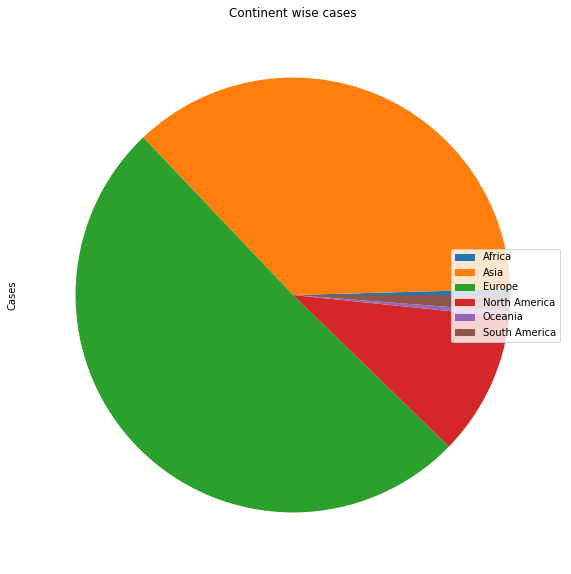

In [136]:
cont_plot = total_cont_cases.plot.pie(y='Cases', title = "Continent wise cases", figsize=(10,10), labeldistance=None).legend(loc='right')

In [137]:
1429+123194+170107+35746+1383+4096

335955